# Ανάλυση Απόφασης Επένδυσης για το Γυμναστήριο FitFlex

## Επιχειρηματικό Σενάριο

Το "FitFlex" είναι ένα καθιερωμένο γυμναστήριο που αντιμετωπίζει αυξανόμενο ανταγωνισμό στην περιοχή του. Για να διατηρήσει το ανταγωνιστικό του πλεονέκτημα, η διοίκηση εξετάζει τρεις στρατηγικές επιλογές:

1. **Στρατηγική Α: Πλήρης Ανακαίνιση & Νέος Εξοπλισμός**
   - Κόστος Επένδυσης: €150.000
   - Περιλαμβάνει: Ριζική ανακαίνιση και αγορά σύγχρονων μηχανημάτων

2. **Στρατηγική Β: Δημιουργία Χώρου Εξειδικευμένων Μαθημάτων**
   - Κόστος Επένδυσης: €70.000
   - Περιλαμβάνει: Μετατροπή αποθήκης σε χώρο για Hot Yoga και Pilates Reformer

3. **Στρατηγική Γ: Καμία Ενέργεια**
   - Κόστος Επένδυσης: €0
   - Διατήρηση υπάρχουσας κατάστασης

In [2]:
# Εισαγωγή απαραίτητων βιβλιοθηκών
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Ρύθμιση για μεγαλύτερο μέγεθος γραφήματος
plt.figure(figsize=(15, 10))

print("Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!")

Οι βιβλιοθήκες φορτώθηκαν επιτυχώς!


<Figure size 1500x1000 with 0 Axes>

## Δημιουργία Δέντρου Απόφασης

Θα χρησιμοποιήσουμε τη βιβλιοθήκη graphviz για να οπτικοποιήσουμε το δέντρο απόφασης. Το δέντρο θα περιλαμβάνει:
1. Τις τρεις στρατηγικές επιλογές
2. Τα πιθανά σενάρια ζήτησης για κάθε επιλογή
3. Τα αναμενόμενα κέρδη/ζημίες για κάθε συνδυασμό

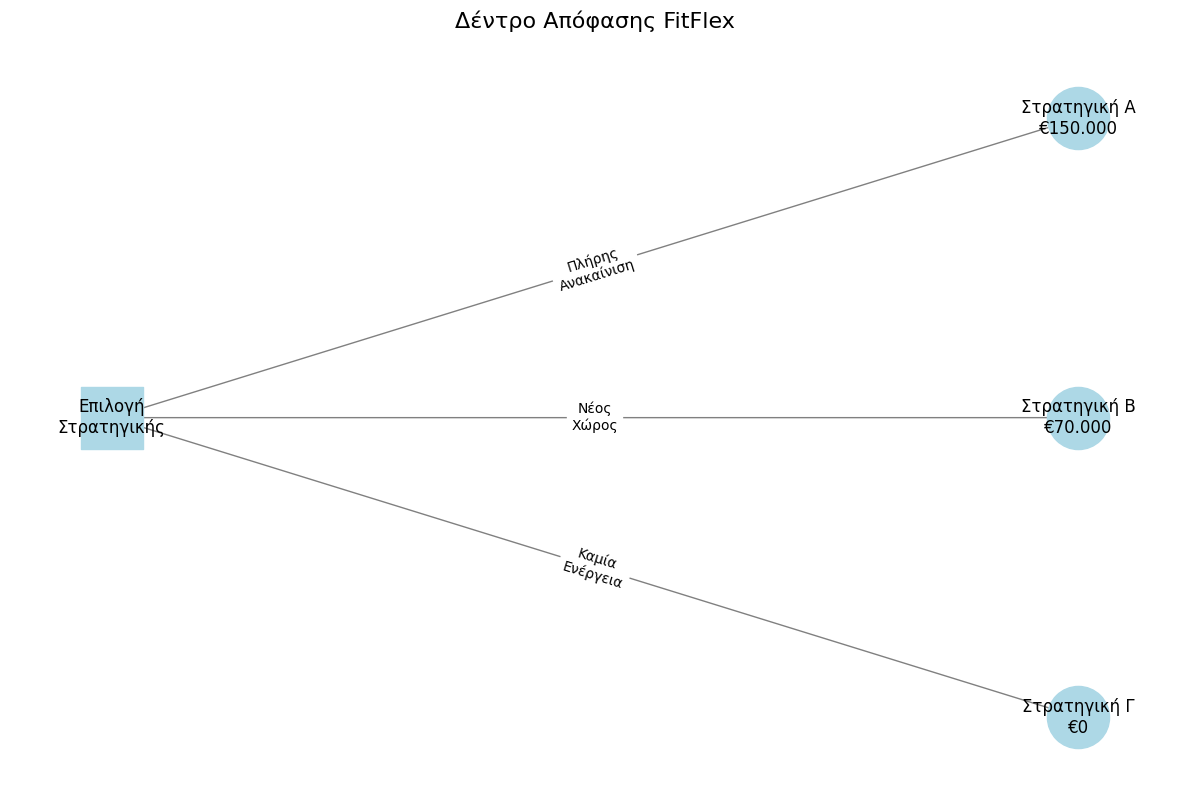

In [3]:
# Δημιουργία του δέντρου απόφασης
G = nx.DiGraph()

# Προσθήκη κόμβων
G.add_node("D1", pos=(0, 0), node_type="decision", label="Επιλογή\nΣτρατηγικής")
G.add_node("C1", pos=(2, 2), node_type="chance", label="Στρατηγική Α\n€150.000")
G.add_node("C2", pos=(2, 0), node_type="chance", label="Στρατηγική Β\n€70.000")
G.add_node("C3", pos=(2, -2), node_type="chance", label="Στρατηγική Γ\n€0")

# Προσθήκη ακμών
G.add_edge("D1", "C1", label="Πλήρης\nΑνακαίνιση")
G.add_edge("D1", "C2", label="Νέος\nΧώρος")
G.add_edge("D1", "C3", label="Καμία\nΕνέργεια")

# Σχεδίαση του δέντρου
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(12, 8))

# Σχεδίαση των ακμών με ετικέτες
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Σχεδίαση των κόμβων
decision_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'decision']
chance_nodes = [node for node, attr in G.nodes(data=True) if attr['node_type'] == 'chance']

nx.draw_networkx_nodes(G, pos, nodelist=decision_nodes, 
                      node_color='lightblue',
                      node_shape='s',
                      node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=chance_nodes, 
                      node_color='lightblue',
                      node_shape='o',
                      node_size=2000)

# Προσθήκη ετικετών στους κόμβους
labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=labels)

plt.title("Δέντρο Απόφασης FitFlex", pad=20, size=16)
plt.axis('off')
plt.tight_layout()
plt.show()